In [ ]:
!pip install git+https://github.com/NHERI-SimCenter/BrailsPlusPlus

# create the Importer

# NSI - BRAILS Integration Example

written bacetiner, fmk, sangri

Create a RegionBoundary for Area of Interest

In [2]:

location = "Tiburon, CA"

import brails
import numpy as np
import os
import sys
import copy
import json

try:
  import plotly.express as px
except:
  !pip install plotly
  import plotly.express as px

# create an Importer

from brails import Importer
importer = Importer()

# create a region boundary 


region_boundary_class = importer.get_class('RegionBoundary')
region_boundary_object = region_boundary_class({'type': 'locationName', 'data': location})


## Create an NSI Inventory

In [3]:
nsi_class = importer.get_class('NSI_Parser')
nsi = nsi_class()
nsi_inventory = nsi.get_raw_data_given_boundary(region_boundary_object, 'ft')
print(f'Total number of assets detected using NSI is {len(nsi_inventory.inventory)}')


Searching for Tiburon, CA...
Found Tiburon, Marin County, California, 94920, United States

Getting National Structure Inventory (NSI) building data for the entered location input...
Found a total of 3597 building points in NSI that are within the entered region of interest
Total number of assets detected using NSI is 3597


In [4]:
## Create an Inventory using a Footprint Scraper, from NSI obtain data for the buildings

In [5]:
# scrape the building inventory
scraper_class = importer.get_class('OSM_FootprintScraper')
scraper = scraper_class({'length': 'ft'})
scraper_inventory = scraper.get_footprints(region_boundary_object)

# get nsi data for the inventory
nsi_processed_data = nsi.get_filtered_data_given_inventory(scraper_inventory)



Searching for Tiburon, CA...
Found Tiburon, Marin County, California, 94920, United States

Found a total of 3249 building footprints in Tiburon

Getting National Structure Inventory (NSI) building data for the entered location input...
Found a total of 2788 building points in NSI that match the footprint data.


## Plot NSI Inventory

In [6]:
# Table for the original data
inventory_df, geom_df, nbldg = nsi_inventory.get_dataframe()
inventory_df.replace('', np.nan, inplace=True) # for visualization
inventory_df.replace('NA', np.nan, inplace=True) # for visualization


In [8]:
inventory_df.columns

Index(['fd_id', 'bid', 'occtype', 'st_damcat', 'bldgtype', 'found_type',
       'cbfips', 'pop2amu65', 'pop2amo65', 'pop2pmu65', 'pop2pmo65', 'sqft',
       'num_story', 'ftprntid', 'ftprntsrc', 'students', 'found_ht',
       'val_struct', 'val_cont', 'val_vehic', 'source', 'med_yr_blt',
       'firmzone', 'o65disable', 'u65disable', 'x', 'y', 'ground_elv',
       'ground_elv_m'],
      dtype='object')

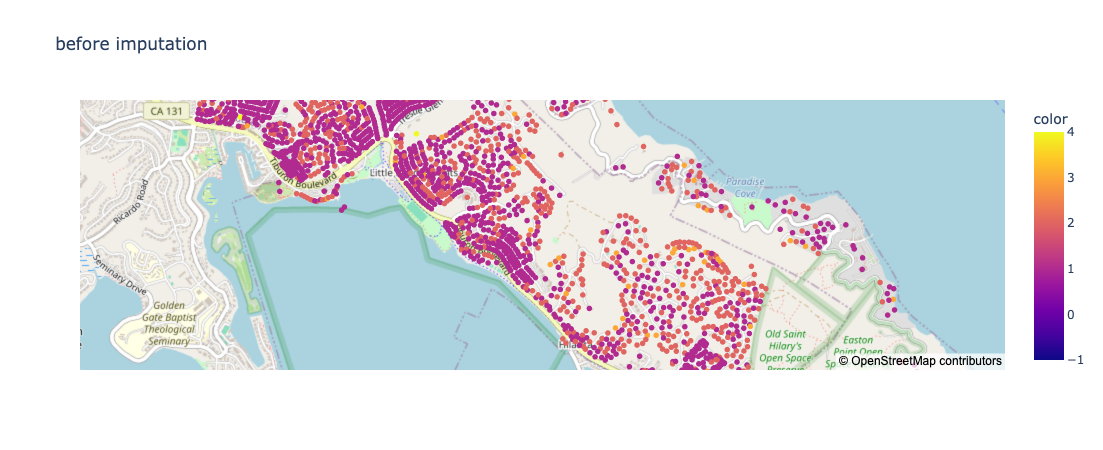

In [7]:
fig = px.scatter_mapbox(geom_df, lat="Lat", lon="Lon", color=(inventory_df["num_story"].astype(float)),range_color=[-1,4],zoom=13, mapbox_style='open-street-map',width=600, height=450,title='NSI RAW DATA - num stories')
fig.show()

## FOOTPRINT with NSI FILTERED

In [9]:
# Table for the original data
inventory_df2, geom_df2, nbldg = scraper_inventory.get_dataframe()
inventory_df2.replace('', np.nan, inplace=True) # for visualization
inventory_df2.replace('NA', np.nan, inplace=True) # for visualization

/var/folders/s9/d3pjgpsd25bgbqdxtrzf_9rh0000gn/T/ipykernel_78944/3249492196.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [12]:
inventory_df2.columns

Index(['buildingheight', 'erabuilt', 'numstories', 'roofshape', 'fpAreas',
       'lon', 'lat', 'fparea', 'repaircost', 'constype', 'occupancy', 'fd_id'],
      dtype='object')

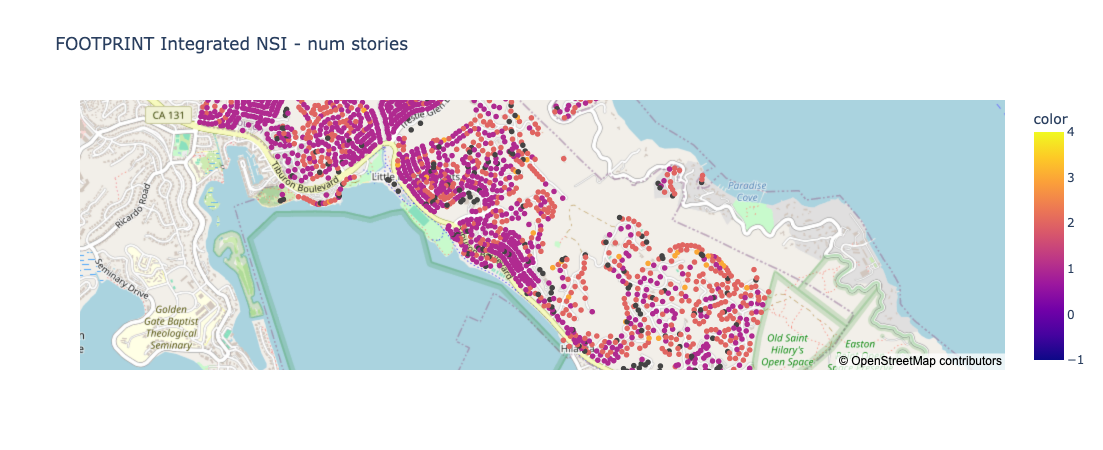

In [14]:
fig = px.scatter_mapbox(geom_df2, lat="Lat", lon="Lon", color=(inventory_df2["numstories"].astype(float)),range_color=[-1,4],zoom=13, mapbox_style='open-street-map',width=600, height=450,title='FOOTPRINT Integrated NSI - num stories')
fig.show()